In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline

# Problem 1a

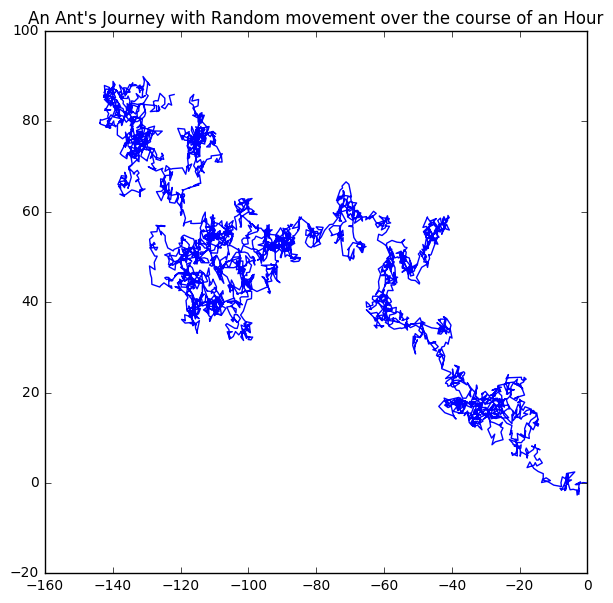

In [3]:
path_x = [0]
path_y = [0]

for i in np.arange(1, 3600):
    path_x.append(path_x[-1] + np.random.normal())
    path_y.append(path_y[-1] + np.random.normal()) 
    
plt.figure(figsize = (7, 7))
plt.plot(path_x, path_y)
plt.title("An Ant's Journey with Random movement over the course of an Hour")

# Problem 1b

In [4]:
bools = []
for i in range(500):
    path_x = [0]
    path_y = [0]
    was_true = False
    for i in np.arange(1, 3600):
        path_x.append(path_x[-1] + np.random.normal())
        path_y.append(path_y[-1] + np.random.normal()) 
    
    for i in range(3600):
        x = path_x[-1] + np.random.normal()
        y = path_y[-1] + np.random.normal()
        if -10 <= x < 10 and -10 <= y < 10:
            bools.append(True)
            was_true = True
            break
        path_x.append(x)
        path_y.append(y)
    if was_true == False:
        bools.append(False)

probability = str(len([i for i in bools if i == True])/ len(bools)) 
print("Based on 500 simulations, the probability of an ant finding it's way home randomly is " + probability)

Based on 500 simulations, the probability of an ant finding it's way home randomly is 0.256


<b> This is not a good strategy as the probability of it happening is so low that it would be the most inefficient way to find it's way back, likely resulting in the ant not finding its way back at all. </b>

# Problem 1c

In [5]:
list_o_mins = []
for i in range(100):
    path_x = [0]
    path_y = [0]
    list_o_distances = []

    for i in np.arange(1, 3600):
        path_x.append(path_x[-1] + np.random.normal())
        path_y.append(path_y[-1] + np.random.normal()) 

    for i in range(3600):
        x = path_x[-1] + np.random.normal()
        y = path_y[-1] + np.random.normal()
        list_o_distances = distance.euclidean((0, 0), (x, y))
        path_x.append(x)
        path_y.append(y)
    list_o_mins.append(np.min(list_o_distances))
    
print("The average closest distance that the ant would get to the nest over 100 trials is " + str(np.mean(list_o_mins)))

The average closest distance that the ant would get to the nest over 100 trials is 100.865278684


# Problem 2

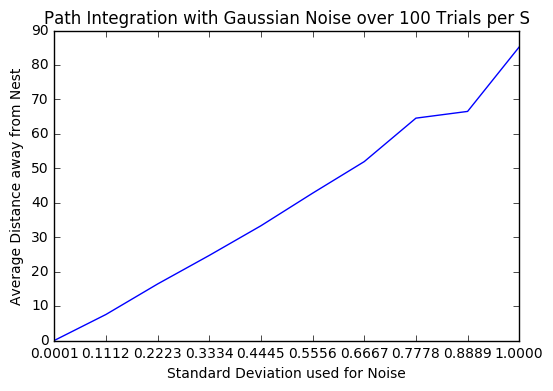

In [6]:
stds = np.linspace(1, 0.0001, 10)
means_o_distances = []
for s in stds:    
    list_o_distances = []
    for i in range(100):
        path_x = [0]
        path_y = [0]
        path_x_noise = 0
        path_y_noise = 0
        for r in np.arange(3600):
            x_dist = np.random.normal()
            y_dist = np.random.normal()
            x = path_x[-1] + x_dist
            y = path_y[-1] + y_dist
            path_x.append(x)
            path_y.append(y) 
            path_x_noise += (x_dist + np.random.normal(scale = s))
            path_y_noise += (y_dist + np.random.normal(scale = s))
        list_o_distances.append(distance.euclidean((0, 0), (path_x[-1] - path_x_noise, path_y[-1] - path_y_noise)))
    means_o_distances.append(np.mean(list_o_distances))
plt.plot(stds, means_o_distances)
plt.xticks(stds)
plt.xlabel("Standard Deviation used for Noise")
plt.ylabel("Average Distance away from Nest")
plt.title("Path Integration with Gaussian Noise over 100 Trials per S")

# Problem 3a

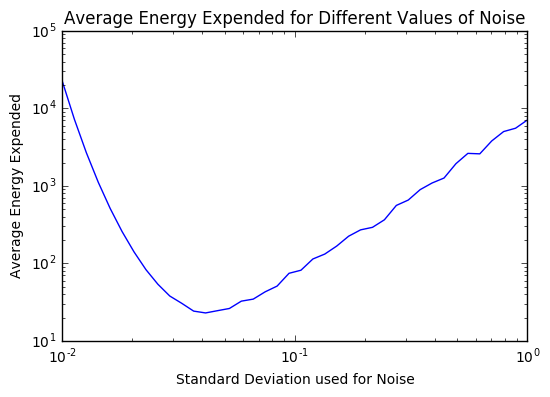

In [12]:
def energy_function(S, D):
    return np.e**(0.1/S) + D**2

stds = np.logspace(0, -2, 40)
list_o_energies_avged = []
for s in stds:    
    list_o_distances = []
    for i in range(100):
        path_x = [0]
        path_y = [0]
        path_x_noise = 0
        path_y_noise = 0
        for r in np.arange(3600):
            x_dist = np.random.normal()
            y_dist = np.random.normal()
            x = path_x[-1] + x_dist
            y = path_y[-1] + y_dist
            path_x.append(x)
            path_y.append(y) 
            path_x_noise += (x_dist + np.random.normal(scale = s))
            path_y_noise += (y_dist + np.random.normal(scale = s))
        list_o_distances.append(distance.euclidean((0, 0), (path_x[-1] - path_x_noise, path_y[-1] - path_y_noise)))
    list_o_energies_avged.append(np.mean([energy_function(s, i) for i in list_o_distances]))
plt.plot(stds, list_o_energies_avged)
plt.xlabel("Standard Deviation used for Noise")
plt.ylabel("Average Energy Expended")
plt.title("Average Energy Expended for Different Values of Noise")
plt.xscale("log")
plt.yscale("log")

# Problem 3b

<b> If the energy expended is at a minimum, that means the energy gained from the food found at the end of the first hour can serve the ant longer, and can be used to do other tasks. This means that a better path integration ability means better energy conservation, meaning a generally longer lifespan and more good done for the nest. </b>